# Analizando textos  en una clase

Vamos a crear una clase que haga una serie de operaciones sobre un texto.

Trabajaremos con los sonetos en http://stanford.edu/~schmit/cme193/ex/data/shakespeare.txt, que están al principio de la colección.

Crea una clase que se inicie con un string largo que sea párrafo con palabras separadas por espacios y puntuación. Este atributo será el *corpus* de la clase.

Desarrolla para la clase y el párrafo introducido los siguientes métodos:
- Método que separa palabras, elimina aquellas  3 letras ó menos y las stopwords, cuenta el número de veces que aparecen y devuelve una lista con las $n$ palabras más frecuentes así como la incidencia sobre el texto en tantos por mil. Esto debe quedar grabado como atributo.
-  Método que añade más texto al corpus global con el mismo proceso anterior. Debe actualizar la proporción.
- Método que devuelve las $n$ palabras del corpus con mayor longitud ordenadas decrecientemente con en tuplas `(palabra,longitud)` .
- Método `__call__` que se ejecute sobre un nuevo texto. Debe devolver:
    - Intersección de palabras entre ambos textos, palabras nuevas que aparecen el texto y antes no estaban.
    - Una medida de la afinidad del corpus con el nuevo texto basado en la **disimilaridad de Jaccard**:
    $$ \dfrac{ \mbox{palabras en común}}{\mbox{palabras en total del corpus más el nuevo texto}}$$
    Esto debe realizarse eliminando las palabras de 3 ó menos letras. Este método da una medida de la riqueza lingüística que aporta un nuevo texto a un  corpus.
    
    
1. **Inicia el corpus con los 100 primeros sonetos de Shakespeare al principio de la web**
2. **Ejecuta el call sobre los siguientes 50 sonetos**

Para hacer este ejercicio y cargar los datos se ha de usar la función `numpy.DataSource` con documentación en https://docs.scipy.org/doc/numpy/reference/generated/numpy.DataSource.html

Una lista de **Stopwords** a no considerar está en http://www.ranks.nl/stopwords

a
about
above
after
again
against
all
am
an
and
any
are
aren't
as
at
be
because
been
before
being
below
between
both
but
by
can't
cannot
could
couldn't
did
didn't
do
does
doesn't
doing
don't
down
during
each
few
for
from
further
had
hadn't
has
hasn't
have
haven't
having
he
he'd
he'll
he's
her
here
here's
hers
herself
him
himself
his
how
how's
i
i'd
i'll
i'm
i've
if
in
into
is
isn't
it
it's
its
itself
let's
me
more
most
mustn't
my
myself
no
nor
not
of
off
on
once
only
or
other
ought
our
ours
ourselves
out
over
own
same
shan't
she
she'd
she'll
she's
should
shouldn't
so
some
such
than
that
that's
the
their
theirs
them
themselves
then
there
there's
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
very
was
wasn't
we
we'd
we'll
we're
we've
were
weren't
what
what's
when
when's
where
where's
which
while
who
who's
whom
why
why's
with
won't
would
wouldn't
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves

## SOLUCIÓN:

In [220]:
listastop="a about above after again against all am an and any are aren't as at be because been before being below between both but by can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once only or other ought our ours ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves"
listastop+=' thee thou mine shall will every though'
stopwords=listastop.split(' ')
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [95]:
#cargamos lso datos usando DataSource en numpy

import numpy as np
url='http://stanford.edu/~schmit/cme193/ex/data/shakespeare.txt'

repos = np.DataSource()
repos.exists(url)

True

In [96]:
datos= repos.open(url)

In [98]:
texto=datos.read()

In [99]:
type(texto)

str

In [100]:
texto.index('1\n') #posición donde empieza el soneto 1

7489

In [112]:
texto.index('101\n') #posición donde empieza el soneto 11

74399

In [113]:
sonetos=texto[7489:74399] #son los 100 primeros sonetos
sonetos

"1\n  From fairest creatures we desire increase,\n  That thereby beauty's rose might never die,\n  But as the riper should by time decease,\n  His tender heir might bear his memory:\n  But thou contracted to thine own bright eyes,\n  Feed'st thy light's flame with self-substantial fuel,\n  Making a famine where abundance lies,\n  Thy self thy foe, to thy sweet self too cruel:\n  Thou that art now the world's fresh ornament,\n  And only herald to the gaudy spring,\n  Within thine own bud buriest thy content,\n  And tender churl mak'st waste in niggarding:\n    Pity the world, or else this glutton be,\n    To eat the world's due, by the grave and thee.\n\n\n                     2\n  When forty winters shall besiege thy brow,\n  And dig deep trenches in thy beauty's field,\n  Thy youth's proud livery so gazed on now,\n  Will be a tattered weed of small worth held:\n  Then being asked, where all thy beauty lies,\n  Where all the treasure of thy lusty days;\n  To say within thine own deep s

In [114]:
#este es el procesamiento que va a hacer la clase
sonetos.replace(
    '\n','').replace(';',' ').replace(', ',' ').replace('. ',' ').replace('-',' ').replace(':',' ').replace("'s",'').replace("'",'').split(' ')

['1',
 '',
 'From',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 '',
 'That',
 'thereby',
 'beauty',
 'rose',
 'might',
 'never',
 'die',
 '',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 '',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 '',
 '',
 'But',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 '',
 'Feedt',
 'thy',
 'light',
 'flame',
 'with',
 'self',
 'substantial',
 'fuel',
 '',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 '',
 'Thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 '',
 '',
 'Thou',
 'that',
 'art',
 'now',
 'the',
 'world',
 'fresh',
 'ornament',
 '',
 'And',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 '',
 'Within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 '',
 'And',
 'tender',
 'churl',
 'makt',
 'waste',
 'in',
 'niggarding',
 '',
 '',
 '',
 '',
 'Pity',
 'the',
 'world',
 'or',
 'else',
 'this

In [104]:
las=['a','ab']
list(filter(lambda x:(len(x)>1)*(x not in stopwords),las))

['ab']

In [105]:
list(filter(lambda x:(x not in stopwords),las))

['ab']

In [206]:
np.flipud(np.argsort(np.array([4,1,7])))

array([2, 0, 1])

In [386]:
class AnalizaTexto():
    def __init__(self,corpus,stopwords):
        self.stopwords=stopwords
        
        lista=corpus.lower().replace('(','').replace('!','').replace('?','').replace(')','').replace('\n','').replace(';',' ').replace(', ',' ').replace('. ',' ').replace('-',' ').replace(':',' ').replace("'s",'').replace("'",'').split(' ')
        lista=list(filter(lambda x:(len(x)>3)*(x not in stopwords),lista))
        
        self.corpus=lista
        self.cuenta=None
        
    def count(self,npalabras):
        """Cuenta la cantidad de veces que aparece cada palabra, 
        representa las 10 palabras más usadas y su frecuencia de modo ordenado"""
        import numpy as np
        m=len(self.corpus)
        aux0,aux1=np.unique(self.corpus,return_counts=True)
        orden=np.flipud(np.argsort(aux1))
        aux0=aux0[orden]      
        aux1=aux1[orden]
        aux2=aux1/m*1000          
        
        self.cuenta=[aux0,aux1,aux2]      
        
        for k in range(npalabras):
            print(self.cuenta[0][k],self.cuenta[2][k])
            
    def addtexto(self,texto):
        stopwords=self.stopwords
        
        lista=texto.lower().replace('(','').replace(')','').replace('\n','').replace(';',' ').replace(', ',' ').replace('. ',' ').replace('-',' ').replace(':',' ').replace("'s",'').replace("'",'').split(' ')
        lista=list(filter(lambda x:(len(x)>3)*(x not in stopwords),lista))
        
        self.corpus+=lista 
        self.count(0)
        
    def palabraslargas(self,npalabras):
        import numpy as np
        lista=self.cuenta[0]
        long=list(map(len,lista))
        orden=np.flipud(np.argsort(long))
        
        for k in orden[:npalabras]:
            print(lista[k],long[k])  
        return list(zip(lista,long))    
    
    def __call__(self,textonuevo):
        stopwords=self.stopwords        
        lista=textonuevo.lower().replace('(','').replace('?','').replace('!','').replace(')','').replace('\n','').replace(';',' ').replace(', ',' ').replace('. ',' ').replace('-',' ').replace(':',' ').replace("'s",'').replace("'",'').split(' ')
        lista=list(filter(lambda x:(len(x)>3)*(x not in stopwords),lista))
        
        wordsinter=set(self.corpus).intersection(lista)
        wordsnew=set(lista).difference(self.corpus)
        wordsunion=set(self.corpus).union(lista)
        print('La similaridad de Jaccard de los textos es ',
              len(wordsinter)/len(wordsunion))
        return wordsinter, wordsnew, wordsunion

In [387]:
b1 = [1,2,3,4,5,9,11,15]
b2 = [4,5,6,7,8]
set(b1).intersection(b2)

{4, 5}

In [388]:
list(map(len,ftext.cuenta[0]))[:10]

[4, 4, 4, 4, 6, 5, 5, 4, 5, 4]

In [389]:
ftext=AnalizaTexto(sonetos,stopwords)
len(ftext.corpus)

5141

In [390]:
ftext.corpus[:15]

['fairest',
 'creatures',
 'desire',
 'increase',
 'thereby',
 'beauty',
 'rose',
 'might',
 'never',
 'riper',
 'time',
 'decease',
 'tender',
 'heir',
 'might']

In [391]:
ftext.count(20)

love 22.1746741879
self 13.2269986384
doth 12.448939895
time 10.1147636647
beauty 9.72573429294
sweet 8.16961680607
thine 6.22446994748
fair 5.83544057576
heart 5.83544057576
eyes 5.83544057576
make 5.6409258899
hath 5.44641120405
live 5.05738183233
world 4.86286714647
still 4.66835246061
praise 4.66835246061
like 4.66835246061
life 4.08480840303
give 4.08480840303
dost 4.08480840303


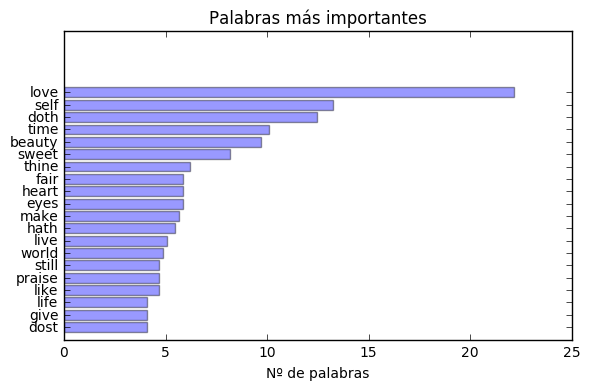

In [392]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
# plt.rcdefaults()

# Example data
topwords = ftext.cuenta[0][:20]
topwordscuenta=ftext.cuenta[2][:20]

y_pos = np.arange(len(topwords))

plt.barh(y_pos, topwordscuenta, align='center', alpha=0.4)
plt.yticks(y_pos, topwords)
plt.xlabel('Nº de palabras')
plt.title('Palabras más importantes')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

In [393]:
# ftext.addtexto(sonetos) #añade el texto que sea
#ftext.count(20) #realiza la cuenta de las palabras

In [394]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

In [395]:
ftext.palabraslargas(20);

prognosticate 13
determination 13
acquaintance 12
distillation 12
intelligence 12
complexioned 12
composition 11
determinate 11
remembrance 11
outstripped 11
perspective 11
substantial 11
confounding 11
impregnable 11
unprovident 11
interchange 11
acknowledge 11
controlling 11
counterfeit 11
unrespected 11


In [397]:
ftext(sonetos);

La similaridad de Jaccard de los textos es  1.0


In [398]:
texto.index('101\n') #posición donde empieza el soneto 101

75048

In [399]:
texto.index('152\n') #posición donde acaba el soneto 151

108130

In [400]:
sonetosadic=texto[75048:108130]

In [403]:
wordsinter, wordsnew, wordsunion=ftext(sonetosadic);

La similaridad de Jaccard de los textos es  0.24420677361853832


In [404]:
wordsnew

{'abhor',
 'abuses',
 'abysm',
 'acceptance',
 'accident',
 'accidents',
 'accumulate',
 'accuse',
 'adder',
 'addeth',
 'admire',
 'admit',
 'admitted',
 'adulterate',
 'afar',
 'affections',
 'afterwards',
 'aggravate',
 'alas',
 'alike',
 'alteration',
 'alters',
 'altring',
 'anchored',
 'angel',
 'angry',
 'answered',
 'anticipate',
 'appeal',
 'appears',
 'applying',
 'aright',
 'array',
 'askance',
 'assemble',
 'assure',
 'augurs',
 'awards',
 'badness',
 'bait',
 'balmy',
 'bases',
 'beams',
 'beautiful',
 'become',
 'becomes',
 'becoming',
 'beds',
 'befriends',
 'begin',
 'belied',
 'believed',
 'bends',
 'beseechers',
 'beseem',
 'beshrew',
 'besides',
 'best,',
 'betraying',
 'bevel',
 'beyond',
 'bind',
 'bird',
 'bitter',
 'blazon',
 'blenches',
 'bliss',
 'blow',
 'bold',
 'boldness',
 'bond',
 'boot',
 'bore',
 'borrowed',
 'bosoms',
 'bough',
 'bower',
 'brand',
 'breasts',
 'breathed',
 'bred',
 'breeds',
 'brightness',
 'broke',
 'builded',
 'built',
 'burned',
 'bu